In [1]:
##import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
train_df = pd.read_csv("D:/DSA/train_ctrUa4K.csv")
test_df = pd.read_csv("D:/DSA/test_lAUu6dG.csv")

In [4]:
train_original=train_df.copy()
test_original=test_df.copy()

In [5]:
##info about dataset

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [8]:
train_df.drop('Loan_ID',axis = 1, inplace = True)

In [9]:
test_df.drop('Loan_ID',axis = 1, inplace = True)

In [10]:
##DATA ANALYSIS

In [11]:
#MISSING VALUES

In [12]:
features_with_na = [features for features in train_df.columns if train_df[features].isnull().sum()>0]
features_with_na

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [13]:
for feature in features_with_na:
    print(feature,np.round(train_df[feature].isnull().mean(),2), ' % missing values')

Gender 0.02  % missing values
Married 0.0  % missing values
Dependents 0.02  % missing values
Self_Employed 0.05  % missing values
LoanAmount 0.04  % missing values
Loan_Amount_Term 0.02  % missing values
Credit_History 0.08  % missing values


In [14]:
#NUMERICAL FEATURES

In [15]:
numerical_features = [feature for feature in train_df.columns if train_df[feature].dtypes != 'O']
print("The length of numerical variables: ", len(numerical_features))
train_df[numerical_features].head()

The length of numerical variables:  5


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [16]:
#DISCRETE VARIABLES

In [17]:
discrete_feature = [feature for feature in numerical_features if len(train_df[feature].unique())<15 ]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
train_df[discrete_feature].head()

Discrete Variables Count: 2


,Loan_Amount_Term,Credit_History
0,360.0,1.0
1,360.0,1.0
2,360.0,1.0
3,360.0,1.0
4,360.0,1.0


In [18]:
#CONTINOUS VARIABLES

In [19]:
continuous_feature = [feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))
train_df[continuous_feature].head()

Continuous feature Count 3


,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849,0.0,NaN
1,4583,1508.0,128.0
2,3000,0.0,66.0
3,2583,2358.0,120.0
4,6000,0.0,141.0


In [20]:
#CATEGORICAL VARIABLES

In [21]:
categorical_features = [feature for feature in train_df.columns if train_df[feature].dtypes == 'O']
print("The length of categorical variables: ", len(categorical_features))
train_df[categorical_features].head()

The length of categorical variables:  7


,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [22]:
for feature in categorical_features:
    print(feature,np.round(train_df[feature].isnull().mean(),2), ' % missing values')

Gender 0.02  % missing values
Married 0.0  % missing values
Dependents 0.02  % missing values
Education 0.0  % missing values
Self_Employed 0.05  % missing values
Property_Area 0.0  % missing values
Loan_Status 0.0  % missing values


In [23]:
##DATA VISUALIZATION

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


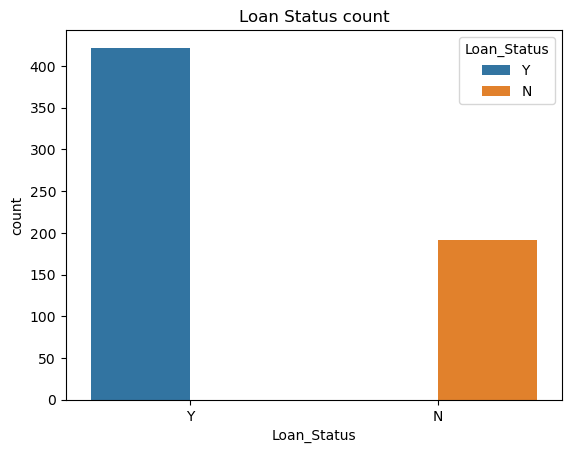

In [24]:
plt.title('Loan Status count')
sns.countplot('Loan_Status',data=train_df,hue='Loan_Status')
plt.show()

#Majority of the applicants are sanctioned Loan

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


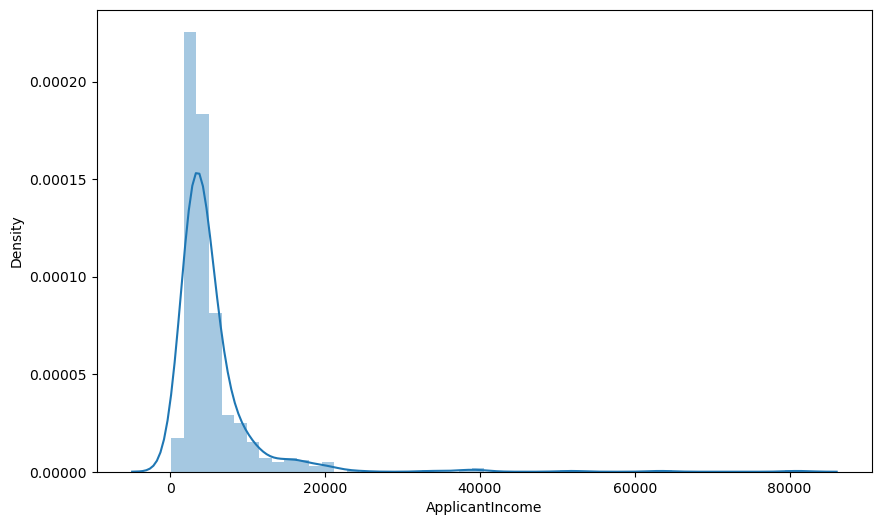

In [25]:
plt.figure(figsize=(10,6))
sns.distplot(train_df['ApplicantIncome'])
plt.show()

# NOT NORMALLY DISTRIBUTED



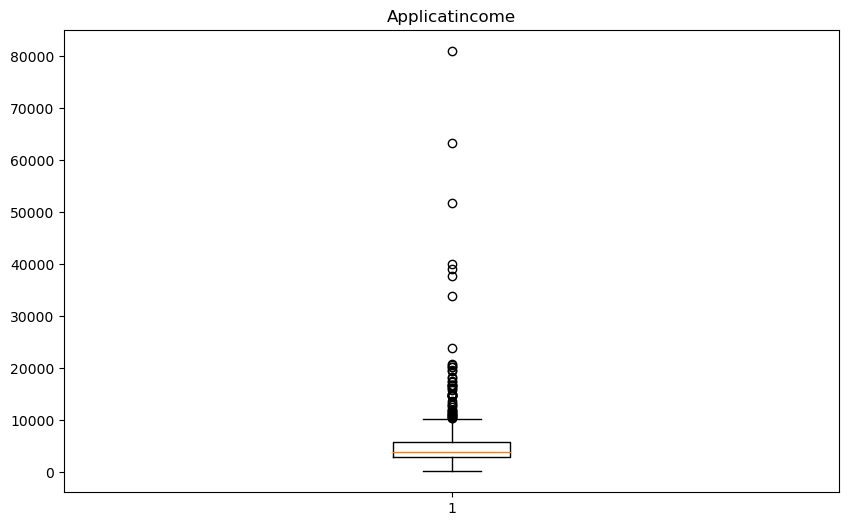

In [26]:
plt.figure(figsize=(10,6))
plt.title('Applicatincome')
plt.boxplot(train_df['ApplicantIncome'],vert=True)
plt.show();

##LOT OF OUTLIERS

<AxesSubplot:>

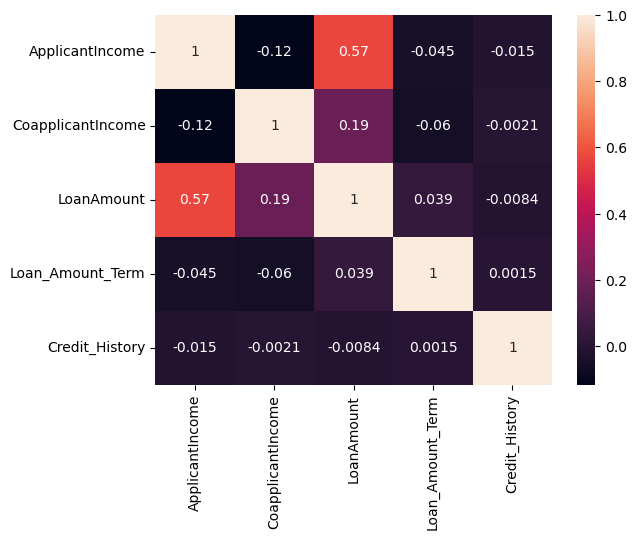

In [27]:

sns.heatmap(train_df.corr(),annot=True)

In [28]:
##FEATURE ENGINEERING

In [29]:
##HANDLING MISSING VALUES

In [30]:
for feature in categorical_features:
    train_df[feature]=train_df[feature].fillna(train_df[feature].mode()[0])

In [31]:
for feature in discrete_feature:
    print(feature,np.round(train_df[feature].isnull().mean(),2), ' % missing values')

Loan_Amount_Term 0.02  % missing values
Credit_History 0.08  % missing values


In [32]:
for feature in ['Loan_Amount_Term', 'Credit_History']:
    train_df[feature]=train_df[feature].fillna(train_df[feature].mode()[0])

In [33]:
for feature in discrete_feature:
    print(feature,np.round(train_df[feature].isnull().mean(),2), ' % missing values')

Loan_Amount_Term 0.0  % missing values
Credit_History 0.0  % missing values


In [34]:
for feature in continuous_feature:
    print(feature,np.round(train_df[feature].isnull().mean(),2), ' % missing values')

ApplicantIncome 0.0  % missing values
CoapplicantIncome 0.0  % missing values
LoanAmount 0.04  % missing values


In [35]:
for feature in ['LoanAmount']:
    train_df[feature]=train_df[feature].fillna(train_df[feature].mode()[0])


In [36]:
for feature in continuous_feature:
    print(feature,np.round(train_df[feature].isnull().mean(),2), ' % missing values')

ApplicantIncome 0.0  % missing values
CoapplicantIncome 0.0  % missing values
LoanAmount 0.0  % missing values


In [37]:
train_df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [38]:
#TREATING OUTLIERS

In [39]:
for feature in continuous_feature:
    data = train_df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
      

In [40]:
##LABEL ENCODING

In [41]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
train_df['Gender'] = label_encoder.fit_transform(train_df['Gender'])

In [42]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
train_df['Married'] = label_encoder.fit_transform(train_df['Married'])

In [43]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
train_df['Education'] = label_encoder.fit_transform(train_df['Education'])

In [44]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
train_df['Self_Employed'] = label_encoder.fit_transform(train_df['Self_Employed'])

In [45]:
#ONE HOT ENCODING

In [46]:
train_df = pd.get_dummies(train_df, columns = ['Dependents'])

In [47]:
train_df = pd.get_dummies(train_df, columns = ['Property_Area'])

In [48]:
#MINMAX SCALING

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_df[["ApplicantIncome"]] = scaler.fit_transform(train_df[["ApplicantIncome"]])

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_df[["CoapplicantIncome"]] = scaler.fit_transform(train_df[["CoapplicantIncome"]])

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_df[["LoanAmount"]] = scaler.fit_transform(train_df[["LoanAmount"]])

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_df[["Loan_Amount_Term"]] = scaler.fit_transform(train_df[["Loan_Amount_Term"]])

In [53]:
train_df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0.070489,0.000000,0.160637,0.743590,1.0,Y,1,0,0,0,0,0,1
1,1,1,0,0,0.054830,0.036192,0.172214,0.743590,1.0,N,0,1,0,0,1,0,0
2,1,1,0,1,0.035250,0.000000,0.082489,0.743590,1.0,Y,1,0,0,0,0,0,1
3,1,1,1,0,0.030093,0.056592,0.160637,0.743590,1.0,Y,1,0,0,0,0,0,1
4,1,0,0,0,0.072356,0.000000,0.191027,0.743590,1.0,Y,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0.034014,0.000000,0.089725,0.743590,1.0,Y,1,0,0,0,1,0,0
610,1,1,0,0,0.048930,0.000000,0.044863,0.358974,1.0,Y,0,0,0,1,1,0,0
611,1,1,0,0,0.097984,0.005760,0.353111,0.743590,1.0,Y,0,1,0,0,0,0,1
612,1,1,0,0,0.091936,0.000000,0.257598,0.743590,1.0,Y,0,0,1,0,0,0,1


In [54]:
#MODEL CREATION

In [55]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x=train_df.drop(['Loan_Status'],axis = 1)
y=train_df['Loan_Status']
x_train, x_cv, y_train, y_cv = train_test_split(x, y, test_size=0.33, random_state = 42)
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_cv)
accuracy_score(y_cv, y_pred)




0.7980295566502463

In [56]:
#HANDLING MISING VALUES OF TEST DATA SET

In [57]:
for feature in ['Loan_Amount_Term', 'Credit_History']:
    test_df[feature]=test_df[feature].fillna(test_df[feature].mean())

In [58]:
for feature in ['LoanAmount']:
    test_df[feature]=test_df[feature].fillna(test_df[feature].mean())

In [59]:
for feature in ['Gender','Dependents','Self_Employed']:
    test_df[feature]=test_df[feature].fillna(test_df[feature].mode()[0])

In [60]:
test_df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [61]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
test_df['Gender'] = label_encoder.fit_transform(test_df['Gender'])

In [62]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
test_df['Married'] = label_encoder.fit_transform(test_df['Married'])

In [63]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
test_df['Education'] = label_encoder.fit_transform(test_df['Education'])

In [64]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
test_df['Self_Employed'] = label_encoder.fit_transform(test_df['Self_Employed'])

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
test_df[["ApplicantIncome"]] = scaler.fit_transform(test_df[["ApplicantIncome"]])

In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
test_df[["CoapplicantIncome"]] = scaler.fit_transform(test_df[["CoapplicantIncome"]])

In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
test_df[["LoanAmount"]] = scaler.fit_transform(test_df[["LoanAmount"]])

In [68]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
test_df[["Loan_Amount_Term"]] = scaler.fit_transform(test_df[["Loan_Amount_Term"]])

In [69]:
test_df = pd.get_dummies(test_df, columns = ['Dependents'])

In [70]:
test_df = pd.get_dummies(test_df, columns = ['Property_Area'])

In [71]:
pred_test = logreg.predict(test_df)

In [72]:
submission = pd.read_csv('D:DSA/sample_submission_49d68Cx.csv')
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [73]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [74]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('D:/DSA/output.csv',index=False)